# <b> Introduction Seaborn

In [1]:
#import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

## Styling

In [3]:
sns.set_theme() #Apply the default theme

## Numerical Plots

* **Distribution**: Histogram, KDE (Kernel Density Estimate), Displot

* **Bar Plot**
* **Count Plot**
* **Box Plot**: Phương pháp để mô tả bằng đồ thị các nhóm dữ liệu số thông qua các phần tư của chúng
* **Facet Plot**: tạo ra một lưới 2d gồm các bảng được xác định bởi các biến tạo thành các hàng và cột.

* **Join Plot**
* **Pair Plot**

* **Heat Map**: một kỹ thuật trực quan hóa dữ liệu cho thấy cường độ của một hiện tượng là màu sắc ở hai chiều


### Distribution Plot
* Univariate distribution of observations

In [5]:
tips_df = sns.load_dataset("tips")

In [6]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


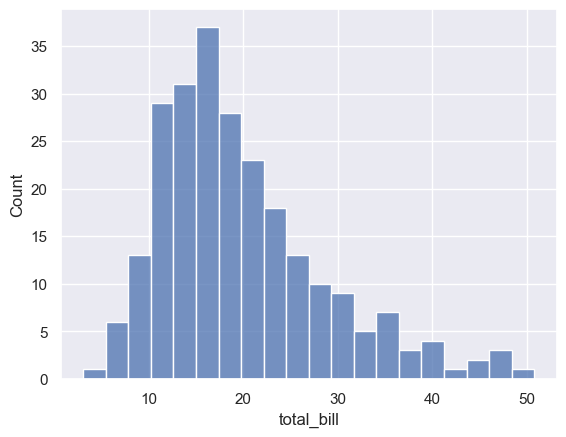

In [13]:
sns.histplot(data=tips_df["total_bill"], bins = 20);

In [12]:
tips_df["total_bill"].value_counts().sort_values(ascending=False)

total_bill
13.42    3
21.01    2
20.69    2
10.33    2
10.34    2
        ..
29.03    1
27.18    1
22.67    1
17.82    1
18.78    1
Name: count, Length: 229, dtype: int64

### KDE Plot
* A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analagous to a histogram. 
* KDE represents the data using a continuous probability density curve in one or more dimensions

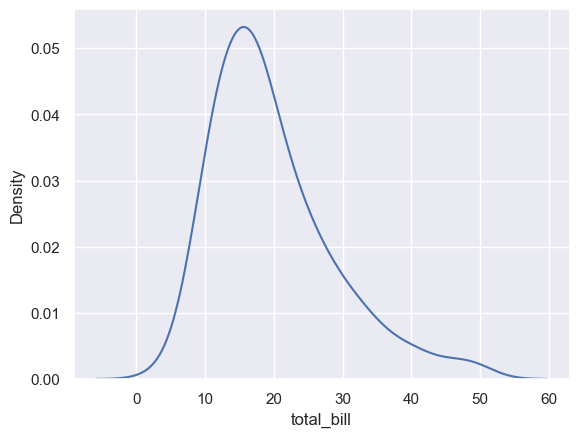

In [14]:
sns.kdeplot(data=tips_df["total_bill"]);

### Displot

* Informative distributional summaries
* Statistical analyses require knowledge about the distribution of variables in your dataset. 
* The seaborn function `displot()` supports several approaches to visualizing distributions. These include classic techniques like histograms and computationally-intensive approaches like kernel density estimation

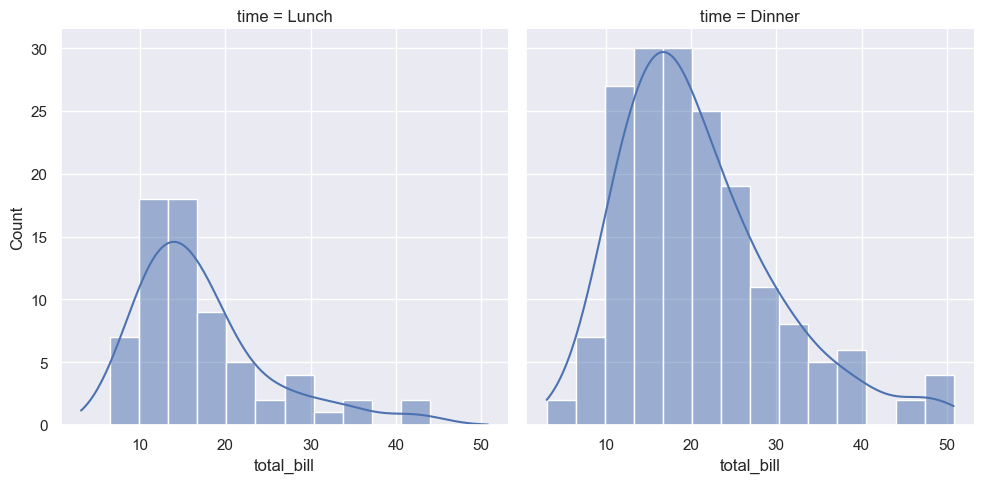

In [17]:
sns.displot(data=tips_df, x= "total_bill", kde = True, col="time");

## Categorical Plots
### Bar Plot

In [18]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


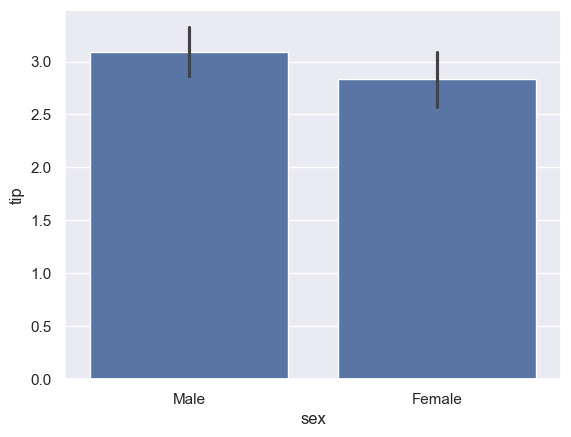

In [24]:
# Giữa nam và nữ ai trả tiền tiếp bao nhiêu
sns.barplot(data = tips_df,
            x="sex", y="tip");

* Nam sẽ trả tiền tip hơn nữ. Với nam thì trung trả 3 đồ tiền tiếp còn nữ thì trả 2 đô 8.
* Với nam thì tiền tip cao nhất là 3 đô 6 thấp nhất là 2 đô 8, còn nữ là 3 đô 1 thấp nhất 2 đô 6.<br>
=> Đàn ông thường hào phóng hơn so với phụ nữ.

### Count Plot

In [25]:
tips_df["sex"].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

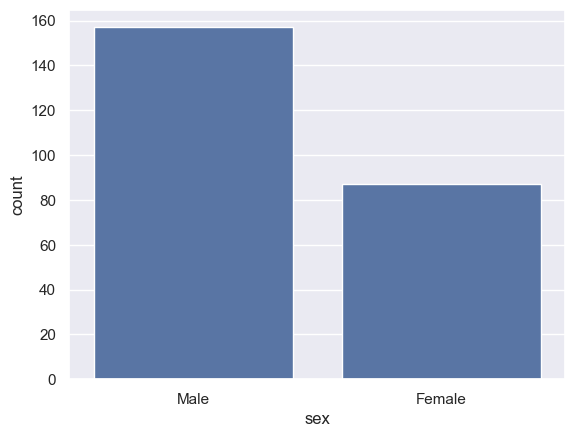

In [27]:
sns.countplot(data=tips_df, x="sex");

### Box Plot
Box Plot is a good indication of how the values in the data are spread out ("minium", first quartile (Q1), median, third quartile (Q3), and “maximum”)
* Identify outliers
* Check if data is symmetrical
* Determine how tightly data is grouped

Resource: https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51

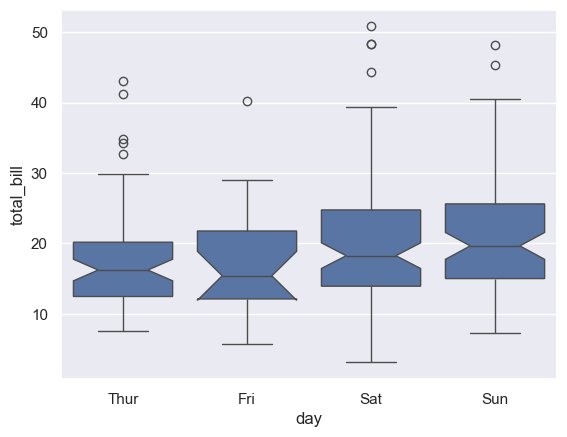

In [39]:
sns.boxplot(data=tips_df, x="day", y="total_bill", notch = True);

* Thứ 5: Giá trị đơn hàng tập trung trong khoảng từ 12 đến 20 đô, giá trị đơn hàng cao nhất là 30 đô, giá trị đơn hàng thấp nhất là 8 đô. Ngoài ra còn có 1 số giá trị ngoại vi (Outlier) điều này có thể hiểu có 1 số khách hàng order những đơn có giá trị > giá trị phân bố trung bình.
* Thứ 6: Giá trị đơn hàng tập trung trong khoảng gần 12 đến 21.5 đô, giá trị đơn hàng cao nhất là 29.5 đô, giá trị đơn hàng thấp nhất là 6 đô. Ngoài ra còn có 1 giá trị ngoại vi (Outlier) điều này có thể hiểu có 1 số khách hàng order đơn có giá trị > giá trị phân bố trung bình.
* Thứ 7: Giá trị đơn hàng tập trung trong khoảng gần 13 đến 25 đô, giá trị đơn hàng cao nhất gần 40 đô, giá trị đơn hàng thấp nhất là 3 đô. Ngoài ra còn có 1 giá trị ngoại vi (Outlier) điều này có thể hiểu có 1 số khách hàng order đơn có giá trị > giá trị phân bố trung bình.
* CN: Giá trị đơn hàng tập trung trong khoảng 15 đến 26 đô, giá trị đơn hàng cao nhất gần 40.5 đô, giá trị đơn hàng thấp nhất là 7.5 đô. Ngoài ra còn có một số giá trị ngoại vi (Outlier) điều này có thể hiểu có 1 số khách hàng order đơn có giá trị > giá trị phân bố trung bình.

=> Thứ 7 và CN thì khách hàng có xu hướng chi nhiều hơn so với những ngày thường.


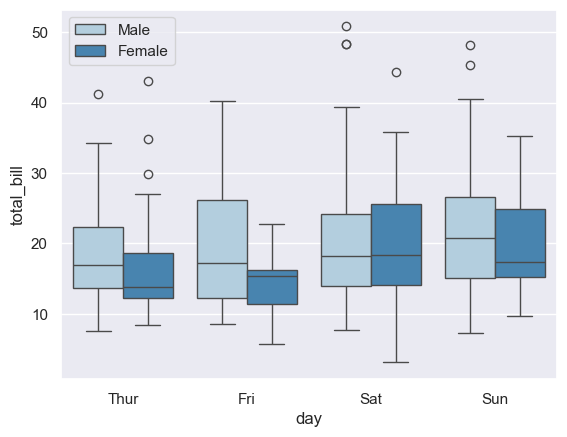

In [38]:
# Kiếm tra chi tiết total bill giữa nam và nữ
sns.boxplot(data=tips_df, x="day", y="total_bill", hue="sex", palette="Blues");
plt.legend(loc=0)

=> Đàn ông có xu hướng chi tiền nhiều hơn so với phụ nữ.

### Facet Grid
* FacetGrid can be drawn with up to three dimensions: `row`, `col`, and `hue`.
* The main approach for visualizing data on this grid is with the FacetGrid.map() method. 

In [40]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


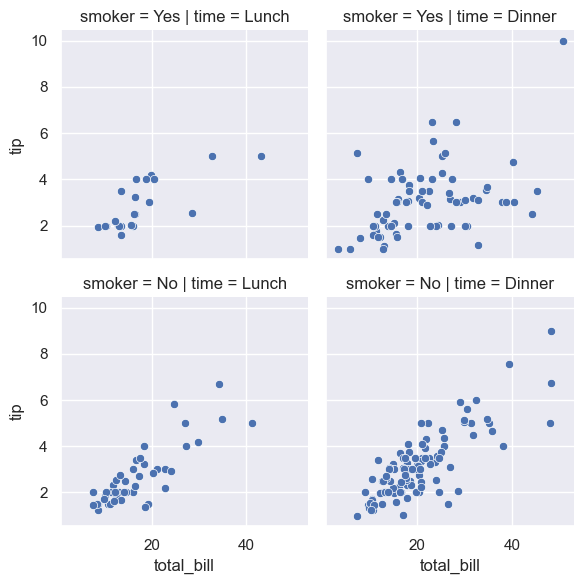

In [44]:
# Tìm sự tương quan giữa thời gian(time), tiền típ (tip) và những người hút thuốc hay ko hút thuốc (smoker)
tips_fg = sns.FacetGrid(data=tips_df,
              row="smoker", col="time"); # Create a class instance of Face Grid class
tips_fg.map(sns.scatterplot, "total_bill", "tip");

* Những người hút thuốc đến quán ít hơn sơ với những người không hút thuốc.
* Khi mà tổng đơn càng lớn thì tiền tip cũng càng lớn.
* Nhiều người ăn tối hơn so với buổi trưa.

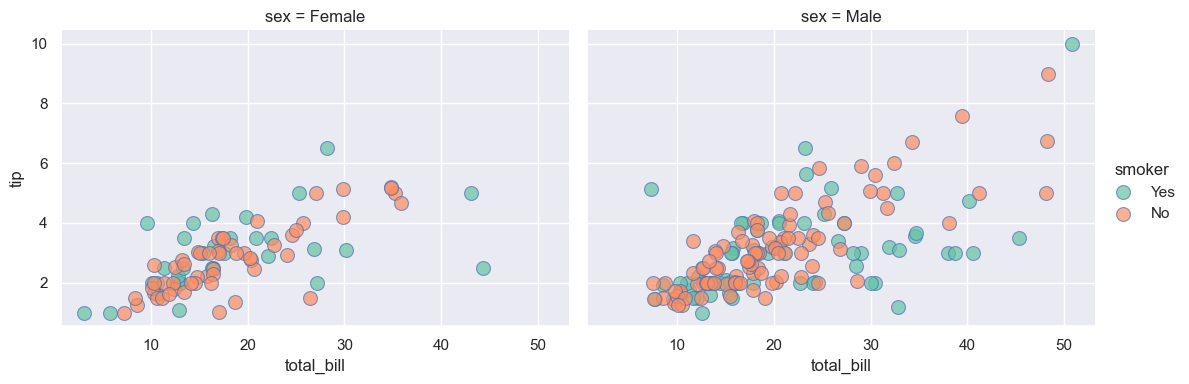

In [56]:
kws = dict(s = 100, edgecolor = "b", alpha = 0.7)
new_fg = sns.FacetGrid(data=tips_df, col="sex",
                       col_order=["Female", "Male"],
                       hue="smoker",
                       palette="Set2",
                       height=4,
                       aspect=1.4); # Create a class instance of Face Grid class
new_fg.map(sns.scatterplot, "total_bill", "tip", **kws);
# **kws: Sẽ tự đồng truyền vào những tham số cho hàm
new_fg.add_legend();

* Nam có giá trị đơn hàng cao hơn so với nữ.<br>
=> Giữa total bill và tip có mối quan hệ tuyến tính nghĩa là đơn hàng càng cao thì tip sẽ cao.

### Joint Plot
* `joint` distribution between two variables along with each variable’s marginal distribution

In [57]:
penguins_df = sns.load_dataset("penguins")

![](Penguins.png)

In [58]:
penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


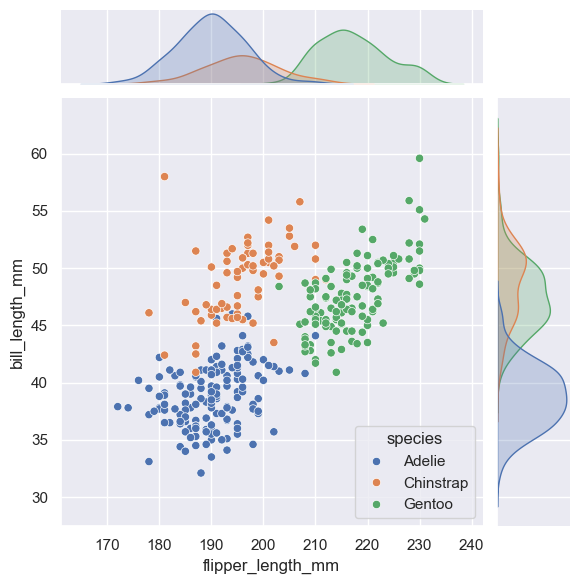

In [61]:
# Vẽ join plot mỗ tả distribution giữa độ dài cánh chinh (flipper_length_mm), độ dài mỏ (bill_length_mm)
sns.jointplot(data=penguins_df, x="flipper_length_mm", y="bill_length_mm", hue="species");

* Loài Gento thì có chiều dài cánh và miệng dài hơn so với 2 loài còn lại. Thêm 1 điểm nữa là chúng có mối tương quan tuyến tính tức cành dài thì mỏ cũng dài hơn.
* Loài Chinstrap thì có chiều dài cánh có vẻ ngang với loài Adelie nhưng chiều dài miệng thì dài hơn.

### Pair Plots

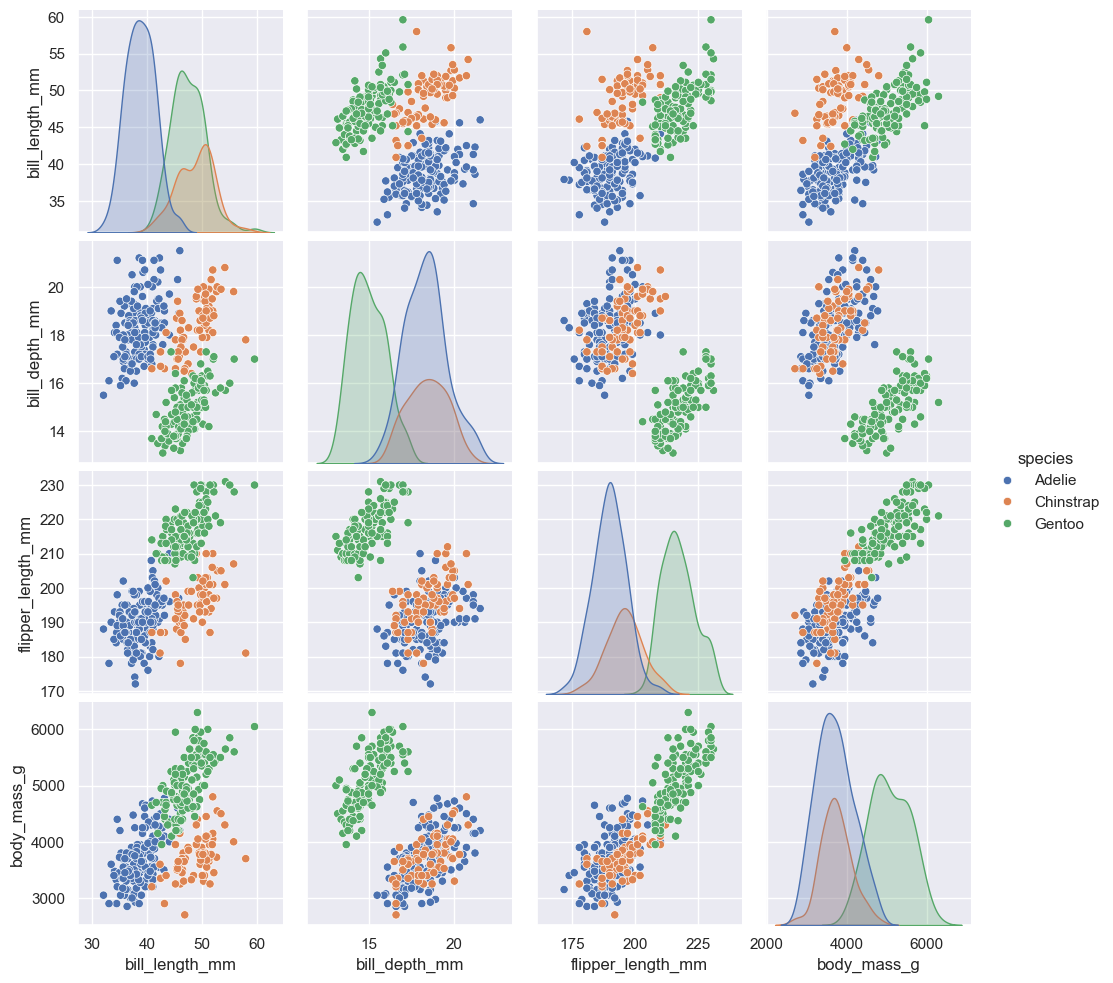

In [62]:
sns.pairplot(data=penguins_df, hue="species")

### Heatmaps
Describing density or intensity of variables, visualize patterns, variance, and even anomalies.

In [63]:
flight_tf = sns.load_dataset("flights")

In [64]:
flight_tf.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [65]:
flights = pd.pivot_table(flight_tf, index="month", columns="year", values="passengers")
flights

C:\Users\Dao Minh Thuan\AppData\Local\Temp\ipykernel_26632\1629227057.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  flights = pd.pivot_table(flight_tf, index="month", columns="year", values="passengers")


year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112.0,115.0,145.0,171.0,196.0,204.0,242.0,284.0,315.0,340.0,360.0,417.0
Feb,118.0,126.0,150.0,180.0,196.0,188.0,233.0,277.0,301.0,318.0,342.0,391.0
Mar,132.0,141.0,178.0,193.0,236.0,235.0,267.0,317.0,356.0,362.0,406.0,419.0
Apr,129.0,135.0,163.0,181.0,235.0,227.0,269.0,313.0,348.0,348.0,396.0,461.0
May,121.0,125.0,172.0,183.0,229.0,234.0,270.0,318.0,355.0,363.0,420.0,472.0
Jun,135.0,149.0,178.0,218.0,243.0,264.0,315.0,374.0,422.0,435.0,472.0,535.0
Jul,148.0,170.0,199.0,230.0,264.0,302.0,364.0,413.0,465.0,491.0,548.0,622.0
Aug,148.0,170.0,199.0,242.0,272.0,293.0,347.0,405.0,467.0,505.0,559.0,606.0
Sep,136.0,158.0,184.0,209.0,237.0,259.0,312.0,355.0,404.0,404.0,463.0,508.0


<Axes: xlabel='year', ylabel='month'>

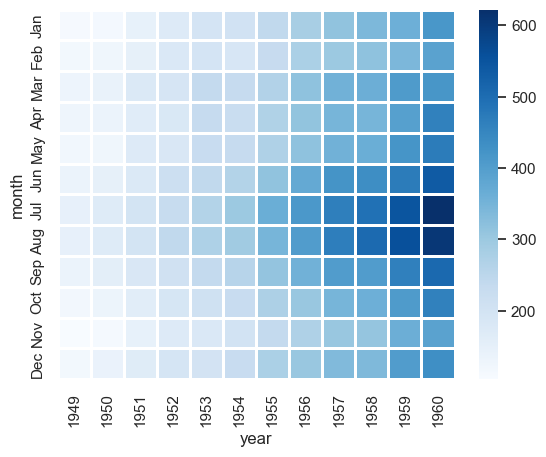

In [68]:
sns.heatmap(data=flights, cmap="Blues", linecolor="white", linewidths=1)

* Từ năm 1949 đến 1954 thì số lượng hành khách máy bay trong 1 tháng chưa nhiều có lẽ thời điểm này máy bay chưa phổ biến.
* Từ những năm 1954 trở về sau thì số lượng hành khách trong 1 tháng tăng mạnh và mạnh nhất vào tháng 7, 8.

## Project: Nutrition data visualisation on 80 cereal products

dataset: https://www.kaggle.com/datasets/crawford/80-cereals

In [69]:
df = pd.read_csv("cereal.csv")

In [70]:
df.head(5)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [ ]:
# irrelevant fields
fields = ["shelf", "weight", "cups", "rating"]
df = df.drop(fields, axis=1)

In [74]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25


In [77]:
# corr()
cereal_corr = df.corr(numeric_only=True)
cereal_corr

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
calories,1.000000,0.019066,0.498610,0.300649,-0.293413,0.250681,0.562340,-0.066609,0.265356
protein,0.019066,1.000000,0.208431,-0.054674,0.500330,-0.130864,-0.329142,0.549407,0.007335
fat,0.498610,0.208431,1.000000,-0.005407,0.016719,-0.318043,0.270819,0.193279,-0.031156
sodium,0.300649,-0.054674,-0.005407,1.000000,-0.070675,0.355983,0.101451,-0.032603,0.361477
fiber,-0.293413,0.500330,0.016719,-0.070675,1.000000,-0.356083,-0.141205,0.903374,-0.032243
carbo,0.250681,-0.130864,-0.318043,0.355983,-0.356083,1.000000,-0.331665,-0.349685,0.258148
sugars,0.562340,-0.329142,0.270819,0.101451,-0.141205,-0.331665,1.000000,0.021696,0.125137
potass,-0.066609,0.549407,0.193279,-0.032603,0.903374,-0.349685,0.021696,1.000000,0.020699
vitamins,0.265356,0.007335,-0.031156,0.361477,-0.032243,0.258148,0.125137,0.020699,1.000000


In [78]:
# one_like can build a matrix of boolean(True, False) with the same shape as our data
ones_corr = np.ones_like(cereal_corr, dtype=bool)
ones_corr

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True]])

In [79]:
ones_corr.shape, cereal_corr.shape

((9, 9), (9, 9))

In [ ]:
# np's triu: return only upper triangle matrix
# Trong NumPy, hàm np.triu() dùng để lấy phần tam giác trên (upper triangle) của một ma trận (array).
# Các phần tử bên dưới đường chéo chính sẽ được thay bằng 0 (hoặc giá trị mặc định).
# np.triu(m, k=0)
# m: Ma trận đầu vào (array).
# k: Độ lệch so với đường chéo chính (mặc định là 0).
# a = np.array([[1, 2, 3],
#               [4, 5, 6],
#               [7, 8, 9]])
# print(np.triu(a))
# Kết quả:
# [[1 2 3]
#  [0 5 6]
#  [0 0 9]]
mask = np.triu(ones_corr)
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False, False, False,  True]])

<Axes: >

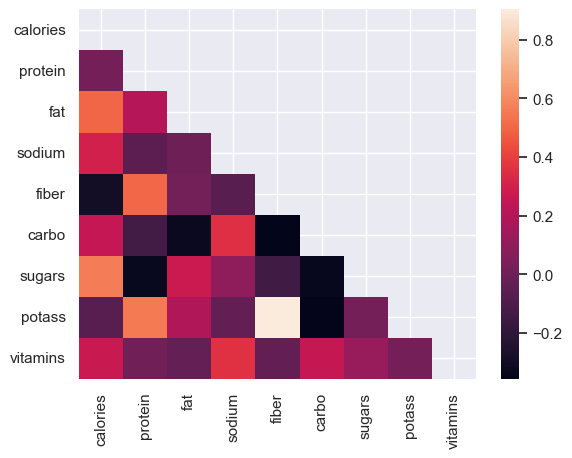

In [81]:
sns.heatmap(data=cereal_corr, mask=mask)

In [82]:
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False, False, False,  True]])

In [83]:
# When removing the upper tri-angle, here are still two empty cells in our matrix (calories & vitamin)
adjusted_mask = mask[1:, :-1]
adjusted_mask

array([[False,  True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False, False,  True],
       [False, False, False, False, False, False, False, False]])

In [84]:
adjusted_cereal_corr = cereal_corr.iloc[1:, :-1]
adjusted_cereal_corr

,calories,protein,fat,sodium,fiber,carbo,sugars,potass
protein,0.019066,1.000000,0.208431,-0.054674,0.500330,-0.130864,-0.329142,0.549407
fat,0.498610,0.208431,1.000000,-0.005407,0.016719,-0.318043,0.270819,0.193279
sodium,0.300649,-0.054674,-0.005407,1.000000,-0.070675,0.355983,0.101451,-0.032603
fiber,-0.293413,0.500330,0.016719,-0.070675,1.000000,-0.356083,-0.141205,0.903374
carbo,0.250681,-0.130864,-0.318043,0.355983,-0.356083,1.000000,-0.331665,-0.349685
sugars,0.562340,-0.329142,0.270819,0.101451,-0.141205,-0.331665,1.000000,0.021696
potass,-0.066609,0.549407,0.193279,-0.032603,0.903374,-0.349685,0.021696,1.000000
vitamins,0.265356,0.007335,-0.031156,0.361477,-0.032243,0.258148,0.125137,0.020699


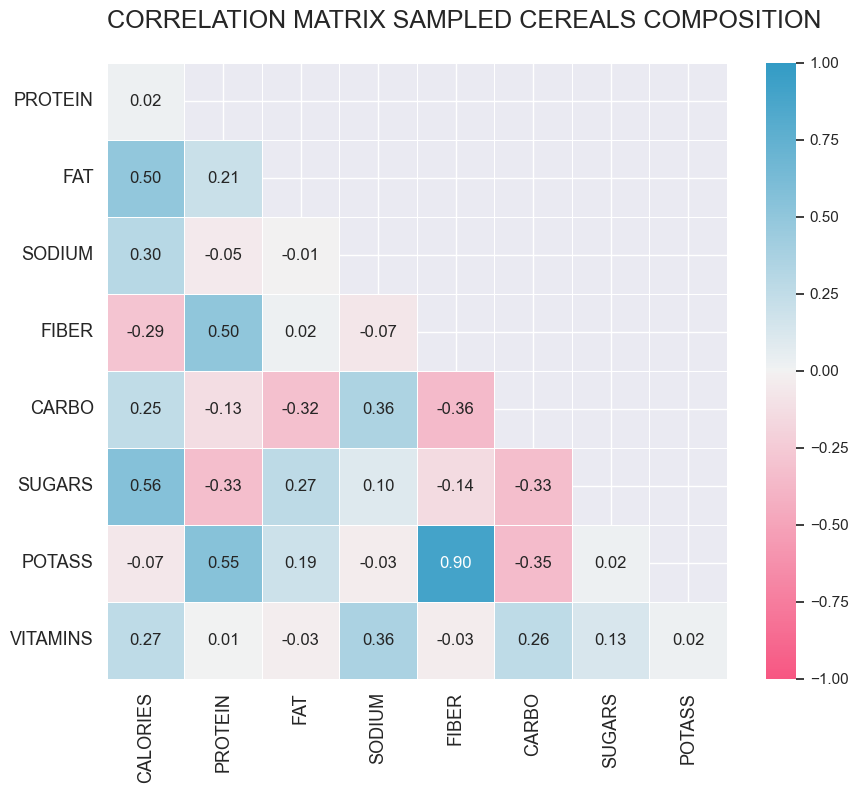

In [94]:
fig, ax = plt.subplots(figsize = (10, 8))
#That method uses HUSL colors, so you need hue, saturation, and lightness. 
#I used hsluv.org to select the colors of this chart.
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

sns.heatmap(data=adjusted_cereal_corr, mask=adjusted_mask,
            annot=True, fmt=".2f", cmap=cmap,
            vmin=-1, vmax=1, linecolor="white", linewidths=0.5)

yticks = [i.upper() for i in adjusted_cereal_corr.index]
xticks = [i.upper() for i in adjusted_cereal_corr.columns]

ax.set_yticklabels(yticks, rotation=0, fontsize=13);
ax.set_xticklabels(xticks, rotation=90, fontsize=13);
title = 'CORRELATION MATRIX SAMPLED CEREALS COMPOSITION\n'
ax.set_title(title, loc='left', fontsize=18);